##### Data Description:

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

##### Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("haberman.csv")

df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


##### Observations:

1. Columns name are missing in the dataset.
2. Need to add column data in dataset.

In [28]:
#df = df.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "axillary_lymph_node", "1.1" : "survival_status"})

In [29]:
df.columns = ['age', 'operation_year', 'axillary_lymph_node', 'survival_status']

In [30]:
df

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  305 non-null    int64
 1   operation_year       305 non-null    int64
 2   axillary_lymph_node  305 non-null    int64
 3   survival_status      305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [32]:
df['survival_status'].value_counts()

survival_status
1    224
2     81
Name: count, dtype: int64

1. Converting the Possitive as 1 and negative as 0
2. 1 as 1 and 2 as 0

In [33]:
survival_status={1:1,2:0}
df['survival_status']=[survival_status[x] for x in df['survival_status']]

In [34]:
df['survival_status'].value_counts()

survival_status
1    224
0     81
Name: count, dtype: int64

In [35]:
df.describe()

,age,operation_year,axillary_lymph_node,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


# Univariate Analysis(pdf, cdf, boxplot and violin plot)

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.



# PDF(Probability Density Function)


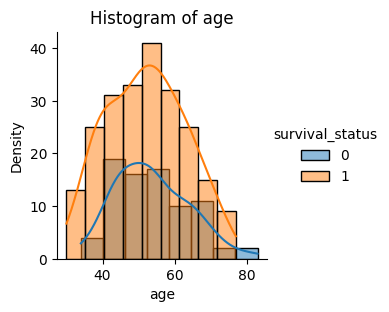

In [36]:
sns.FacetGrid(df, hue="survival_status").map(sns.histplot, "age", kde=True).add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

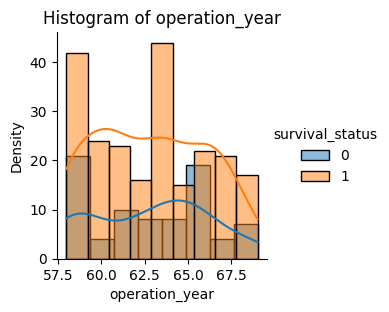

In [37]:
sns.FacetGrid(df, hue="survival_status").map(sns.histplot, "operation_year", kde=True).add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

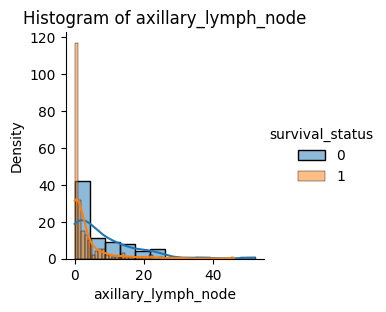

In [38]:
sns.FacetGrid(df, hue="survival_status").map(sns.histplot, "axillary_lymph_node", kde=True).add_legend()
plt.title("Histogram of axillary_lymph_node")
plt.ylabel("Density")
plt.show()

# CDF(Cummulative Distributed Function)

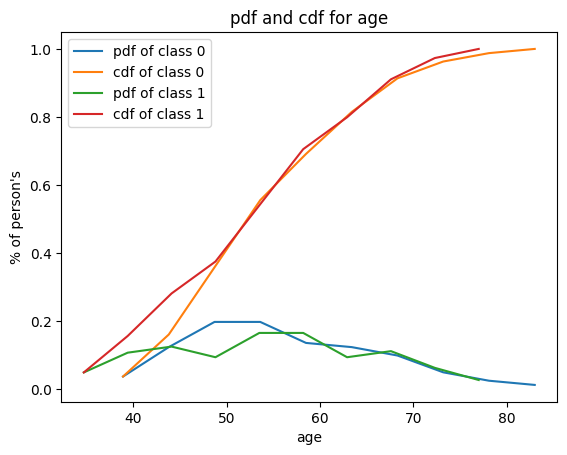

In [39]:
zero = df.loc[df["survival_status"] == 0]
one = df.loc[df["survival_status"] == 1]
label = ["pdf of class 0", "cdf of class 0", "pdf of class 1", "cdf of class 1"]
counts, bin_edges = np.histogram(zero["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

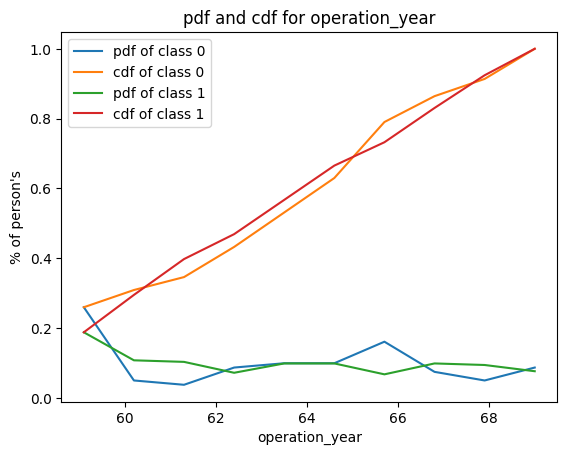

In [40]:
zero = df.loc[df["survival_status"] == 0]
one = df.loc[df["survival_status"] == 1]
label = ["pdf of class 0", "cdf of class 0", "pdf of class 1", "cdf of class 1"]
counts, bin_edges = np.histogram(zero["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for operation_year")
plt.xlabel("operation_year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(one["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

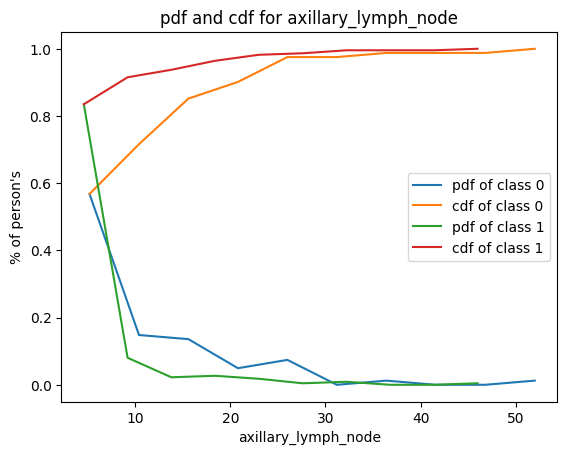

In [41]:
zero = df.loc[df["survival_status"] == 0]
one = df.loc[df["survival_status"] == 1]
label = ["pdf of class 0", "cdf of class 0", "pdf of class 1", "cdf of class 1"]
counts, bin_edges = np.histogram(zero["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for axillary_lymph_node")
plt.xlabel("axillary_lymph_node")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(one["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

### Observations

1. 15% of the person's have less than or equal to age 37 who survived.
2. perosons' who has more than 46 auxillary_lymph_node not survived.

# Box Plot

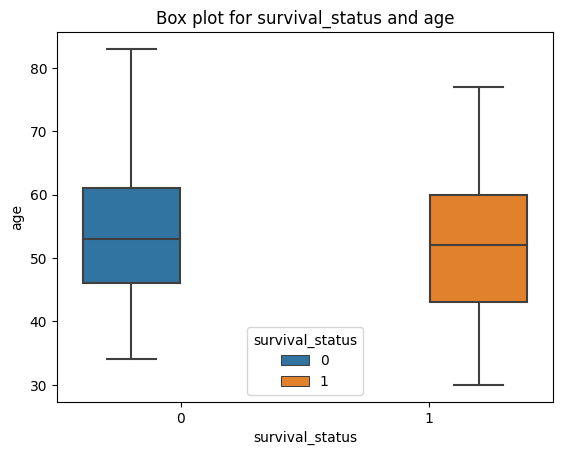

In [42]:
# boxplot gives you the statistical summery of data
# Rectangle represent the 2nd and 3rd quartile (horizontal line either side of the rectangle)
# The horizontal line inside box represents median
# We can add title in box plot using either way
# plt.title("Box plot for survival_status and age") or set_title("")

sns.boxplot(x = "survival_status", y = "age", hue = "survival_status", data = df).set_title("Box plot for survival_status and age")
plt.show()

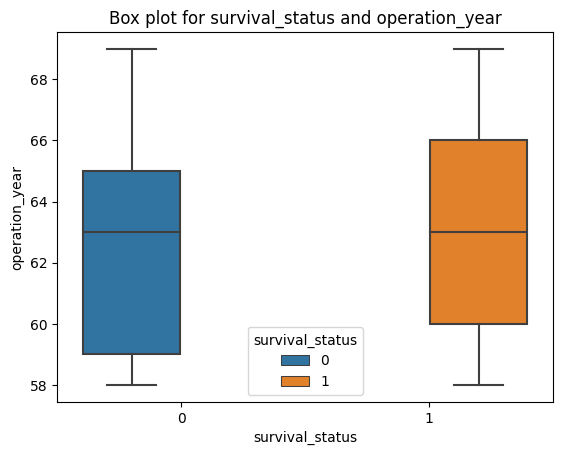

In [43]:
sns.boxplot(x = "survival_status", y = "operation_year", hue = "survival_status", data = df).set_title("Box plot for survival_status and operation_year")
plt.show()

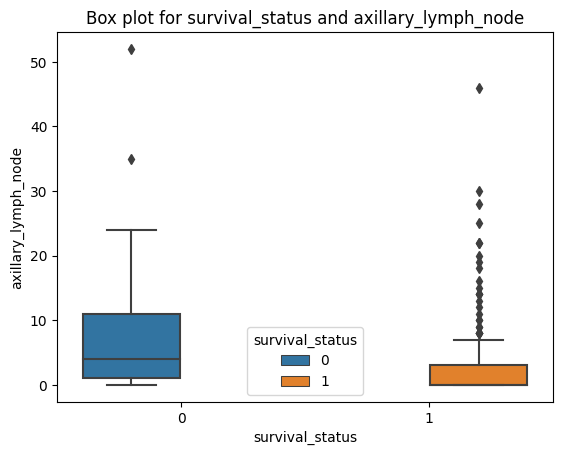

In [44]:
sns.boxplot(x = "survival_status", y = "axillary_lymph_node", hue = "survival_status", data = df).set_title("Box plot for survival_status and axillary_lymph_node")
plt.show()

# Violin Plot

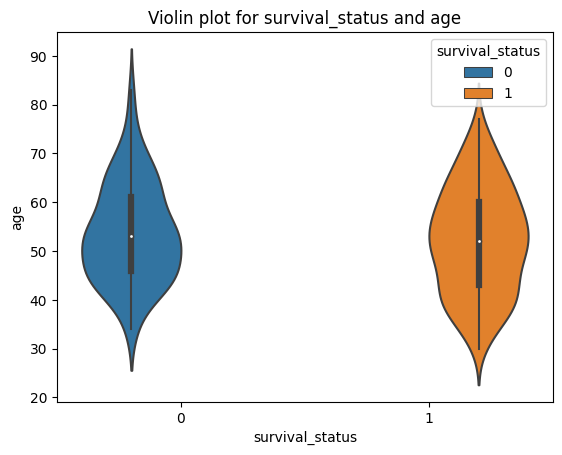

In [45]:
# The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median

sns.violinplot(x = "survival_status", y = "age", hue = "survival_status", data = df)
plt.title("Violin plot for survival_status and age")
plt.show()

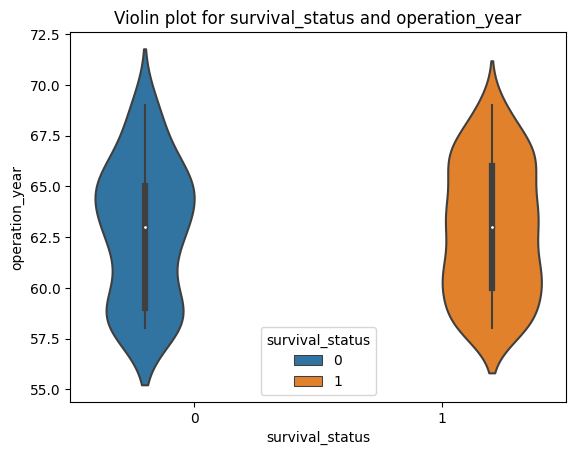

In [46]:
sns.violinplot(x = "survival_status", y = "operation_year", hue = "survival_status", data = df)
plt.title("Violin plot for survival_status and operation_year")
plt.show()

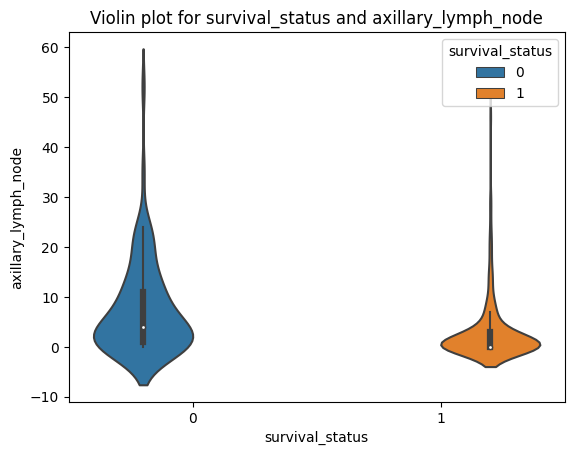

In [47]:
sns.violinplot(x = "survival_status", y = "axillary_lymph_node", hue = "survival_status", data = df)
plt.title("Violin plot for survival_status and axillary_lymph_node")
plt.show()

# Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them

# Scatter Plot
A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

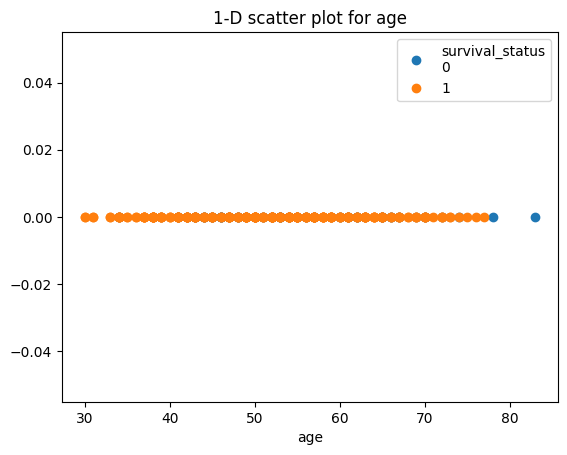

In [49]:
# 1-d scatter plot

zero = df.loc[df["survival_status"] == 0]
one = df.loc[df["survival_status"] == 1]
plt.plot(zero["age"], np.zeros_like(zero["age"]), 'o', label = "survival_status\n" "0")
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label = "1")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

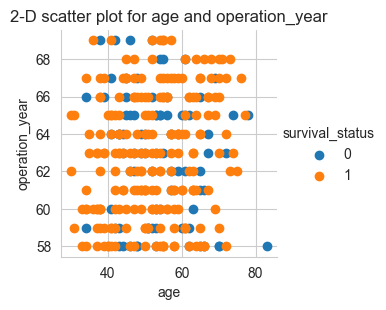

In [50]:
# 2d scatter plot with color coding for each class

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status").map(plt.scatter, "age", "operation_year").add_legend()
plt.title("2-D scatter plot for age and operation_year")
plt.show()

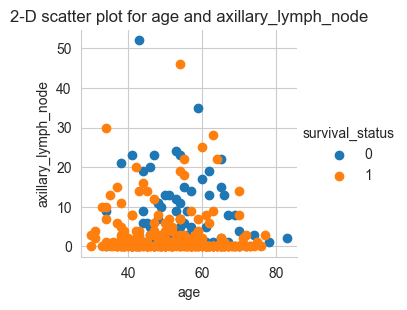

In [52]:
# 2d scatter plot 

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status").map(plt.scatter, "age", "axillary_lymph_node").add_legend()
plt.title("2-D scatter plot for age and axillary_lymph_node")
plt.show()

# observations

1. In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable
2. 0-5 axillary_lymph_node person survived and died as well but the died ratio is less than survive ratio.

# Pair plot

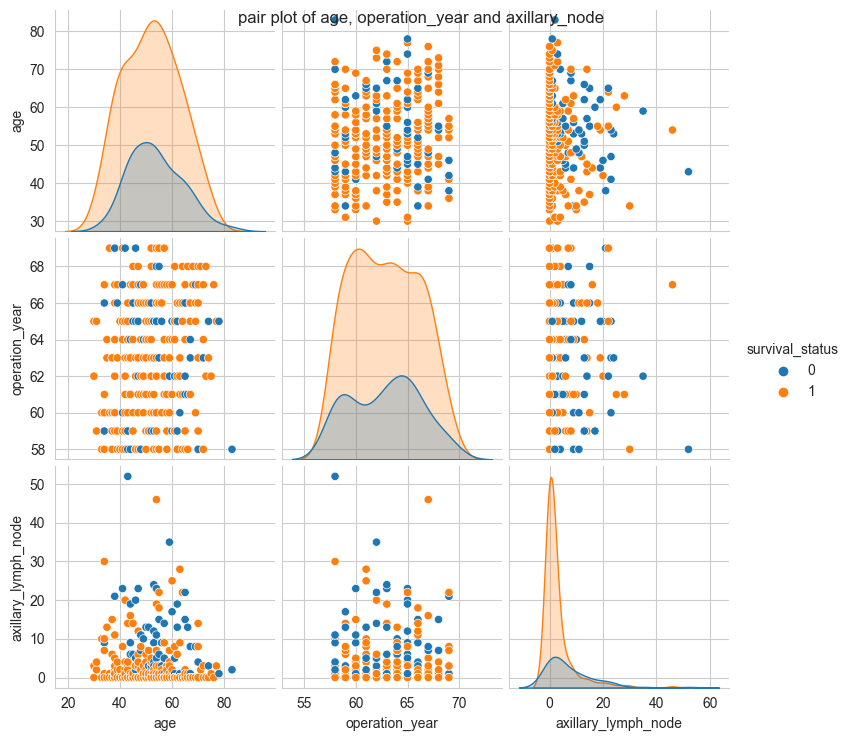

In [54]:
sns.set_style("whitegrid")
sns.pairplot(df, hue = "survival_status", vars = ["age", "operation_year", "axillary_lymph_node"])
plt.suptitle("pair plot of age, operation_year and axillary_node")
plt.show()

# Observation
1. As we are unable to classify which is the most useful feature because of too much overlapping. But, Somehow we can say, In operation_year, 60-65 more person died who has less than 6 axillary_lymph_node.
2. And hence, this plot is not much informative in this case.

# Conclusion

1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.
3. somehow axillary_lymph_node is giving some intution in the dataset.
4. we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.